# Big Data Project 

# Improving Restaurant performance by performing Sentiment classification on online food reviews

## Abstract

Online food reviews are an important asset for users as well as for the restaurants serving the food. Most of the online reviews are in a free text format, which is difficult for the computer systems to analyze. In this project we will take the raw data from different social media websites, clean it to get the data with which we can work on and perform sentiment classification on the data using some famous classification algorithms to improve the quality of food from certain restaurants which has bad reviews and increase the overall performance of the restaurant. This project can further be expanded to predict what kind of food from a restaurant is likely to be ordered and if it is a healthy consumption.


## Related domain of study
This project aims to improve the business performance of restaurants and fast foods by detecting what kind of food item on their menu brings their ratings down. This can be achieved by using Naïve Bayes algorithm.

## Data sources

I will be using data from yelp.com

- •	https://www.yelp.com/dataset/download
- •	https://www.kaggle.com/yelp-dataset/yelp-dataset#yelp_academic_dataset_review.json



## Gathering data

I wanted to work with the csv version of the files provided by yelp, and found them on kaggle.
Luckily, i found one at https://www.kaggle.com/z5025122/yelp-csv.

I downloaded the <b>reviews</b> file which contains the business_id, review, ratings and other columns along with the <b>business</b> file which had the corresponding restaurant names, addresses of the business_id in reviews file.

The review file was very huge to process, so i decided to use only some part of the data instead the whole file and worked on the first 20,000 rows.

In [11]:
import pandas as pd
raw_review = pd.read_csv(".\data\yelp_review.csv", nrows=15000)
raw_review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [12]:
raw_review.to_csv(r'.\data\sampletextfile.csv')

Reducing the data by removing columns which are not needed.

In [14]:
#loading the data
reviews= pd.read_csv(".\data\sampletextfile.csv")
business = pd.read_csv(".\data\yelp_business.csv")

preview the data

In [16]:
reviews.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [17]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Merge the two files(reviews dataframe and business dataframe) for easy use.

In [18]:
result = pd.merge(reviews,business, how='left', on=['business_id'])

In [19]:
result.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,...,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,categories
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,...,"""34 Avenue Fairmount Ouest""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,1,Diners;Food;Restaurants;Delis
1,1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,...,"""4662 Rue Notre-Dame O""",Montréal,QC,H4C 1S7,45.472902,-73.588321,4.5,50,1,Restaurants;Canadian (New);Italian
2,2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,...,"""1057 Avenue Bernard""",Outremont,QC,H2V 1V1,45.522144,-73.607076,4.0,70,1,Specialty Food;Food;Sandwiches;Restaurants;Bur...
3,3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,...,"""698 Rue Sainte-Catherine O""",Montréal,QC,H3B 1B9,45.502510,-73.570119,3.5,61,1,Fast Food;Restaurants;Burgers
4,4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,...,"""355 Place Royale""",Montréal,QC,H2Y 1Z6,45.503544,-73.554469,4.5,397,1,Bakeries;Restaurants;Food;Sandwiches;Cafes;Cof...


Testing the result dataframe

In [20]:
# return review of a restaurant whose business id is AE..A
result['text'].loc[result['business_id'] == 'AEx2SYEUJmTxVVB18LlCwA' ]


0       Super simple place but amazing nonetheless. It...
6221    *The shop was featured on Mind of a Chef with ...
Name: text, dtype: object

To keep this interesting, lets do some visualising on the existing data.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#we can create a new column in yelp called text length. This column will store the number of characters in each review.
result['text length'] = result['text'].apply(len)

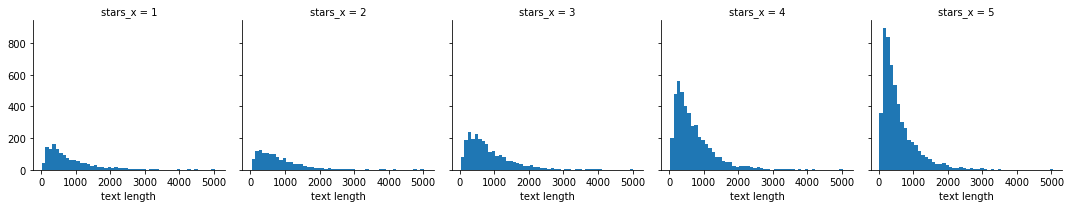

In [24]:
# The graph plots text length vs stars
g = sns.FacetGrid(data=result, col='stars_x')
g.map(plt.hist, 'text length', bins=50)

According to the graph above, we understand that the longer the review, the star rating is more.

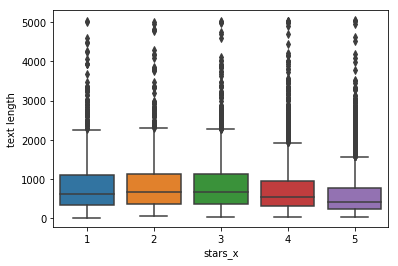

In [25]:
#This can also be shown on a boxplot
sns.boxplot(x='stars_x', y='text length', data=result)

Top 20 restaurants in the data set sorted on the basis of sum and mean of star Ratings.


In [33]:
info = pd.pivot_table(result,index=['name'],values=['stars_x'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)

info.head(20)

#https://www.kaggle.com/ritzdevp/sentiment-analysis-using-nltk

,sum,mean
,stars_x,stars_x
name,,
"""'ONO Poké Bar""",9,4.5
"""0109 Dessert & Chocolate""",3,3.0
"""1 Brothers Pizza""",4,4.0
"""1 OAK""",3,3.0
"""103 Hot Pilates & Yoga""",5,5.0
"""107 SkyLounge""",12,4.0
"""1130 The Restaurant""",8,4.0
"""12 West Main""",3,3.0


Decribe the data

In [35]:
result.describe()

,Unnamed: 0,stars_x,useful,funny,cool,latitude,longitude,stars_y,review_count,is_open,text length
count,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,3.752733,1.594800,0.61380,0.734933,37.410253,-100.388898,3.754667,320.044467,0.869200,719.248867
std,4330.271354,1.285341,2.967109,1.75994,1.872389,4.459448,20.455655,0.676492,623.346750,0.337193,628.391805
min,0.000000,1.000000,0.000000,0.00000,0.000000,33.204863,-122.499387,1.000000,3.000000,0.000000,19.000000
25%,3749.750000,3.000000,0.000000,0.00000,0.000000,33.611398,-115.151261,3.500000,37.000000,1.000000,286.000000
50%,7499.500000,4.000000,1.000000,0.00000,0.000000,36.103276,-111.932108,4.000000,117.000000,1.000000,530.000000
75%,11249.250000,5.000000,2.000000,1.00000,1.000000,40.454330,-80.848935,4.000000,331.000000,1.000000,954.000000
max,14999.000000,5.000000,95.000000,46.00000,43.000000,57.479062,115.086769,5.000000,7361.000000,1.000000,5062.000000


## Sentiment Analysis

I used VADER to perform sentiment Analysis.
"VADER (Valence Aware Dictionary for sEntiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion."
Further details about VADER can be found at 

http://datameetsmedia.com/vader-sentiment-analysis-explained/


In [36]:
all_reviews = result['text']
all_sent_values = []
all_sentiments = []

In [37]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    res = analyser.polarity_scores(paragraph)
    score = res['compound']
    return round(score,1)

C:\python\envs\py27\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [39]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Akhila
[nltk_data]     Sharon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
#testing VADER on the 101th review
sample = result['text'][101]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

Sometimes it feels SO good to be SO bad...for you. I have been dying to try out an actual poutinerie for a long time and it did not disappoint. I've been twice now. Once I had the basic poutine and once I had the pulled pork poutine. Both are good, but I really love that pulled pork poutine. The BBQ sauce they have has just a touch of sweetness and it really compliments the fries and cheese curds. A large poutine is more than enough for two people and I liked the little restaurant space with the 80s glam rock playing and quirky pictures on the walls. I guess my only criticism is that they need more seating. Both times I've been we got lucky and managed to snag seats as someone was leaving, but it's gross out on the street and this summer anyway, it's been SO hot outside. They don't have space for more seats, so this isn't really something they can easily fix, but maybe something to keep in mind for future establishments? Anyway, if you want a very unhealthy treat, it's a go!
Sentiment:

In [45]:
# to run VADER on the entire file (load all the 15000 rows)
temp_data = result[0:15000]

In [46]:
temp_data.shape

(15000, 23)

In [48]:
import timeit
start_time = timeit.default_timer() #to check time of execution
for i in range(0,15000):
    all_sent_values.append(sentiment_value(all_reviews[i])) # will take a while
elapsed = timeit.default_timer() - start_time

In [50]:
elapsed #check time of evaluation

176.1670709301105

In [57]:
SENTIMENT_VALUE = []
SENTIMENT= []
for i in range(0,15000):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive') # give a sentiment of v.positive to star ratings ranging from 0.5 to 1
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')  # give a sentiment of positive to star ratings ranging from 0.5 to 0
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')  # give a sentiment of v.positive to star ratings of 0
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')  # give a sentiment of negative to star ratings ranging from -0.5 to 0
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')  # give a sentiment of v.negative to star ratings ranging from -0.5 t0 -1
        SENTIMENT_VALUE.append(1)

In [58]:
#Append SENTIMENT and SENTIMENT_VALUE to the temp_data
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

C:\python\envs\py27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\python\envs\py27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
#view dataframe
temp_data[['business_id','name','SENTIMENT_VALUE']].head(20)

,business_id,name,SENTIMENT_VALUE
0,AEx2SYEUJmTxVVB18LlCwA,"""Wilensky's""",5
1,VR6GpWIda3SfvPC-lg9H3w,"""Tuck Shop""",5
2,CKC0-MOWMqoeWf6s-szl8g,"""Lester's Deli""",5
3,ACFtxLv8pGrrxMm6EgjreA,"""Five Guys""",5
4,s2I_Ni76bjJNK9yG60iD-Q,"""Maison Christian Faure""",5
5,8QWPlVQ6D-OExqXoaD2Z1g,"""Vegas Pub Crawler""",5
6,9_CGhHMz8698M9-PkVf0CQ,"""Little Coxwell Vietnamese & Thai Cuisine""",5
7,gkCorLgPyQLsptTHalL61g,"""Broadview Espresso""",5
8,5r6-G9C4YLbC7Ziz57l3rQ,"""Poutini's House of Poutine""",5
9,fDF_o2JPU8BR1Gya--jRIA,"""My Dog Spot""",5


In [60]:
#find accuracy between the user given star ratings and VADER generated sentiment value
counter = 0
for i in range(0,15000):
    if (abs(temp_data['stars_x'][i]-temp_data['SENTIMENT_VALUE'][i])>1):
        counter += 1

In [61]:
from __future__ import division
accuracy = (temp_data.shape[0]-counter) / temp_data.shape[0]
percent_accuracy = accuracy*100
percent_accuracy 

74.70666666666666

The above analysis shows that there is 74.7% match between user given star ratings and VADER generated sentiment value

### Top 10 restaurants in the data set sorted on the basis of sum and mean of star Ratings and sentiment value.

In [62]:
testingtop10 = pd.pivot_table(temp_data,index=['name'],values=['stars_x','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
#testing3 = testing3.sort_values(by=('sum'), ascending = False)
testingtop10.head(10)

sum                    mean        
                           SENTIMENT_VALUE stars_x SENTIMENT_VALUE stars_x
name                                                                      
"'ONO Poké Bar"                         10       9             5.0     4.5
"0109 Dessert & Chocolate"               5       3             5.0     3.0
"1 Brothers Pizza"                       5       4             5.0     4.0
"1 OAK"                                  5       3             5.0     3.0
"103 Hot Pilates & Yoga"                 5       5             5.0     5.0
"107 SkyLounge"                         15      12             5.0     4.0
"1130 The Restaurant"                   10       8             5.0     4.0
"12 West Main"                           5       3             5.0     3.0
"120 Diner"                              5       3             5.0     3.0
"131 Main"                               5       4             5.0     4.0

#### Test the dataframe to get relevent reviews of relevent business

In [63]:
#get review of a business where business_id is CKC0-MOWMqoeWf6s-szl8g
temp_data['text'].loc[temp_data['business_id'] == 'CKC0-MOWMqoeWf6s-szl8g' ]

2    Lester's is located in a beautiful neighborhoo...
Name: text, dtype: object

In [64]:
#get sentiment value and rating of a particular business id.
temp_data[['text','SENTIMENT_VALUE','stars_x']].loc[temp_data['business_id'] == "8QWPlVQ6D-OExqXoaD2Z1g" ]

,text,SENTIMENT_VALUE,stars_x
5,Cycle Pub Las Vegas was a blast! Got a groupon...,5,5


## Further analysis

We can't read eacha and every review of a particular review if the reviews list is huge. We can add name entity recognition to process the data further to give the restaurants the key words in the review along with the sentiment and sentiment value

I used spaCy to perform name entity recognition.

https://spacy.io/usage/spacy-101

In [65]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [67]:
#testing spacy
from __future__ import unicode_literals
doc = nlp("Next week I'll be in Madrid.")
for ent in doc.ents:
    print(ent.text, ent.label_)

(u'Next week', u'DATE')
(u'Madrid', u'GPE')


To perform name entity recognition on the reviews , we need to know what items are in the menu and what are the common food items. I found data from https://github.com/vabraham/foodie_favorites/tree/master/data which had the restaurant menu items in the form of pickles

In [69]:
import pandas as pd
import csv
from six.moves import cPickle as pickle
import numpy as np

In [77]:
main_food_df = pd.read_pickle(".\data\word_list.pkl") #load common food

In [78]:
menu_list_prep = pd.read_pickle(".\data\menu_list.pkl") #load menu list

In [79]:
menu_prep_two =[name[:-1] if name.endswith('\r')  else name for name in menu_list_prep] #clean the unwanted data

In [73]:
import unicodedata

menu_prep_three_df = [x.encode('UTF8') for x in menu_prep_two]

In [75]:
from __future__ import unicode_literals
menu_d_df=[]
for item in menu_prep_three_df:
    if len(item.split()) < 3:
        menu_d_df.append(item)

In [80]:
import spacy
import en_core_web_sm
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span


nlp = en_core_web_sm.load() 
patterns = [nlp(item.decode('utf8')) for item in  main_food_df]  # process each word to create phrase pattern
matcher = PhraseMatcher(nlp.vocab)
matcher.add('MAINFOOD', None, *patterns)  # add patterns to matcher
patternstwo = [nlp(itemtwo.decode('utf8')) for itemtwo in menu_d_df]  # process each word to create phrase pattern
matcher = PhraseMatcher(nlp.vocab)
matcher.add('INMENU', None, *patternstwo)  # add patterns to matcher

doc = nlp("I love the Asparagus Prawn from this place")
matches = matcher(doc)

for match_id, start, end in matches:
    # create a new Span for each match and use the match_id  as the label
    span = Span(doc, start, end, label=match_id)
    doc.ents = list(doc.ents) + [span]  # add span to doc.ents

print([(ent.text, ent.label_) for ent in doc.ents]) 

[(u'the', u'ORG'), (u'Asparagus', u'INMENU'), (u'Prawn', u'INMENU')]


The above program identifies Asparagus and prawns as inmenu item from the line "I love the Asparagus Prawn from this place".

The above the analysis can be applied to the entire review file to skim the reviews and gather the main information.
This way the restaurants can track the items which has less reviews and ratings and put effort into inproving them.

## References

1.	https://onlinelibrary.wiley.com/doi/full/10.1111/cgf.13217
2.	https://medium.com/@martinpella/naive-bayes-for-sentiment-analysis-49b37db18bf8
3.	https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis
4.	https://itnext.io/sentiment-analysis-concept-analysis-and-applications-8b2c1c6fd77a
5.	https://www.upgrad.com/blog/sentiment-analysis-what-is-it-and-why-does-it-matter/
6.  http://datameetsmedia.com/vader-sentiment-analysis-explained/
7.  https://github.com/vabraham/foodie_favorites/tree/master/data
8.  https://spacy.io/usage/spacy-101
